In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import scmdata
import seaborn as sns
import numpy as np
import pandas as pd

import utils

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [4]:
OUTPUT_DIR = Path(utils.DATA_DIR / "interim" / "delta_rf")
OUTPUT_FILE_META = OUTPUT_DIR / f"{ID}_delta-erf_meta_TCRE.csv"

<IPython.core.display.Javascript object>

In [5]:
META_FILE = utils.DATA_DIR / "interim" / "delta_rf" / f"{ID}_delta-erf_meta.csv"

<IPython.core.display.Javascript object>

In [6]:
data = pd.read_csv(str(Path(META_FILE)))

<IPython.core.display.Javascript object>

In [7]:
data.columns

Index(['2030_warming', '2100_warming', '2500_warming', 'SRM_at_first_crossing',
       'TCRE', 'average_annual_emissions_2030_net-zero',
       'average_cdr_between_net0_and_15', 'climate_model',
       'cumulative_emms_15', 'cumulative_emms_net0_to_15',
       'cumulative_emms_peak_warming', 'cumulative_emms_peak_warming_to_15',
       'cumulative_pos_emms_at_15', 'cumulative_pos_emms_at_net0',
       'ensemble_member', 'max_assigned_CDR', 'max_deployed_CDR', 'model',
       'ms', 'net-zero_year', 'net_CDR_at_15_temp', 'peak_warming', 'region',
       'run_id', 'scenario', 'total_CDR', 'unit', 'variable',
       'year_return_back_below_15_temp'],
      dtype='object')

<IPython.core.display.Javascript object>

### calculate TCRE down & convert CDR from MtCO2 to PgC

In [8]:
data["TCRE_down"] = 0
for i, row in data.iterrows():
    if row["year_return_back_below_15_temp"] == 9999:
        try:
            row["TCRE_down"] = (row["2500_warming"] - row["peak_warming"]) / (
                (row["cumulative_emms_peak_warming_to_15"] * 1e-6) / 3.67
            )
        except ZeroDivisionError:
            row["TCRE_down"] = np.nan

    elif row["year_return_back_below_15_temp"] == 1111:
        row["TCRE_down"] = np.nan
    elif 1111 < row["year_return_back_below_15_temp"] < 9999:
        row["TCRE_down"] = (1.5 - row["peak_warming"]) / (
            (row["cumulative_emms_peak_warming_to_15"] * 1e-6) / 3.67
        )
    else:
        print("error")
        break

<IPython.core.display.Javascript object>

In [9]:
# replace infinate values
data["TCRE_down"].replace([np.inf, -np.inf], np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
data["TCRE_down"].describe()

count    624600.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: TCRE_down, dtype: float64

<IPython.core.display.Javascript object>

In [28]:
print(data["TCRE_down"].quantile(0.05))
print(data["TCRE_down"].quantile(0.95))


-6.883148352858598
12.441894977222605


<IPython.core.display.Javascript object>

In [29]:
## set values outside of the 1-99th percentile range to nan
data.loc[data.TCRE_down > data["TCRE_down"].quantile(0.99), "TCRE_down"] = np.nan
data.loc[data.TCRE_down < data["TCRE_down"].quantile(0.01), "TCRE_down"] = np.nan
# data.loc[data.TCRE_down > 0, "TCRE_down"] = np.nan

<IPython.core.display.Javascript object>

In [30]:
data["TCRE_down"].describe()

count    567639.000000
mean          2.733291
std           6.854475
min         -39.601427
25%           1.059668
50%           2.268662
75%           3.971063
max          61.429788
Name: TCRE_down, dtype: float64

<IPython.core.display.Javascript object>

Text(0.5, 0, 'TCRE down')

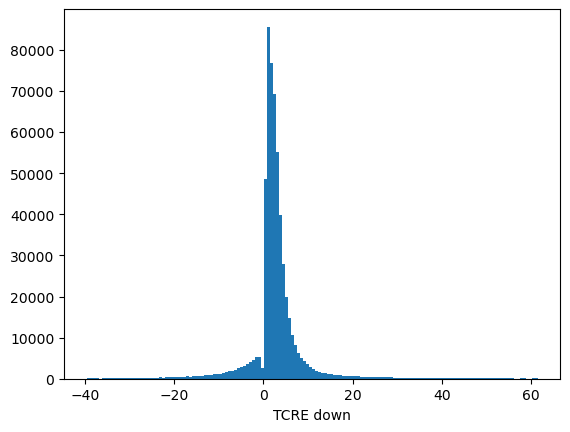

<IPython.core.display.Javascript object>

In [31]:
plt.hist(data["TCRE_down"], bins=150)
plt.xlabel("TCRE down")


### TCRE up

In [62]:
data["TCRE_up"] = (data["peak_warming"] - data["2030_warming"]) / (
    (data["cumulative_emms_peak_warming"] * 1e-6) / 3.67
)

<IPython.core.display.Javascript object>

In [63]:
# replace infinate values
data["TCRE_up"].replace([np.inf, -np.inf], np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [64]:
data["TCRE_up"].describe()

count    595227.000000
mean          2.861745
std          48.430923
min       -2866.667726
25%           1.586426
50%           2.137972
75%           2.992372
max       10020.226109
Name: TCRE_up, dtype: float64

<IPython.core.display.Javascript object>

In [66]:
print(data["TCRE_up"].quantile(0.01))
print(data["TCRE_up"].quantile(0.99))

0.44598574928905693
13.788460551038018


<IPython.core.display.Javascript object>

In [53]:
## set values outside of the 1-99th percentile range to nan
data.loc[data.TCRE_up > data["TCRE_up"].quantile(0.99), "TCRE_up"] = np.nan
data.loc[data.TCRE_up < data["TCRE_up"].quantile(0.01), "TCRE_up"] = np.nan


<IPython.core.display.Javascript object>

Text(0.5, 0, 'TCRE_up')

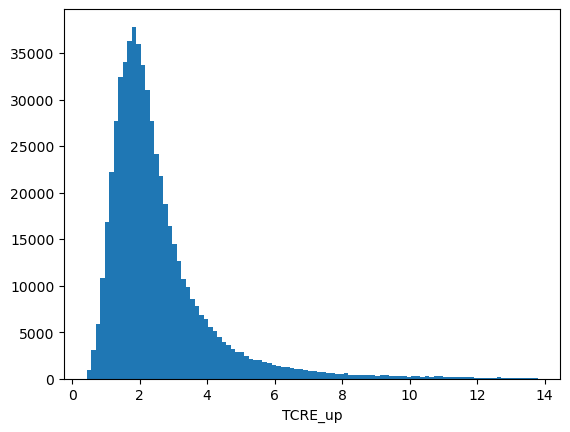

<IPython.core.display.Javascript object>

In [54]:
plt.hist(data["TCRE_up"], bins=100)
plt.xlabel("TCRE_up")

### Save

In [55]:
data.to_csv(str(OUTPUT_FILE_META))

<IPython.core.display.Javascript object>